In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
Color_pal = sns.color_palette()
import xgboost as Xg
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

C:\Users\jayku\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Bitcoin
BTC = pd.read_csv('archive crypto/coin_Bitcoin.csv')
BTC['Date']= pd.to_datetime(BTC['Date']).dt.date
BTC.rename(columns={'Close':'BTC_Close','Volume':'BTC_Volume'}, inplace= True)

# Ethereum
ETH = pd.read_csv('archive crypto/coin_Ethereum.csv')
ETH['Date']= pd.to_datetime(ETH['Date']).dt.date
ETH.rename(columns={'Close':'ETH_Close','Volume':'ETH_Volume'}, inplace= True)


#Binance Coin
BNB = pd.read_csv('archive crypto/coin_BinanceCoin.csv')
BNB['Date']= pd.to_datetime(BNB['Date']).dt.date
BNB.rename(columns={'Close':'BNB_Close','Volume':'BNB_Volume'}, inplace= True)


In [3]:
df = BTC.copy()
# Bitcoin = Bitcoin.set_index('Date')
df = df[['Date','BTC_Close']]
df.head()

,Date,BTC_Close
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000


In [4]:
df = df.set_index('Date')

df.head()

,BTC_Close
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000


In [5]:
df.index= pd.to_datetime(df.index)

In [6]:
df.head()

,BTC_Close
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000


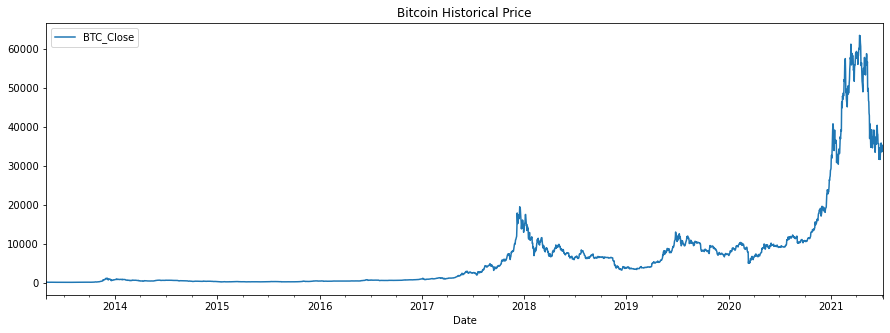

In [7]:
# Bitcoin = Bitcoin.set_index('Date')
df.plot(style = '-', figsize = (15,5),color = Color_pal[0],title = 'Bitcoin Historical Price')
plt.show()

 ### Train / Test Split

In [8]:

print(df.shape)
train = df.iloc[:-100]
test = df.iloc[-100:]
print(train.shape,test.shape)

(2991, 1)
(2891, 1) (100, 1)


In [9]:
train.head()

,BTC_Close
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000


In [10]:
test.head()

,BTC_Close
Date,
2021-03-29,57750.199871
2021-03-30,58917.693045
2021-03-31,58918.832714
2021-04-01,59095.807978
2021-04-02,59384.313359


<AxesSubplot:xlabel='Date'>

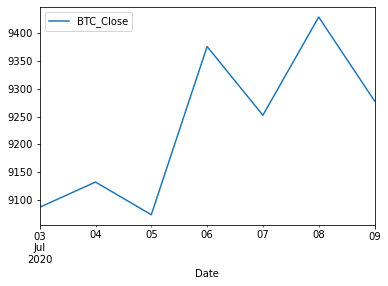

In [11]:
df.loc[(df.index>'2020-07-02') & (df.index <'2020-07-10')].plot()

## Feature Creation


In [12]:
def create_features(df):
    """
    Create Time series features based on index.
    """
    df = df.copy()
    df['Dayofweek'] = df.index.day_of_week
    df ['Quater']= df.index.quarter
    df ['Month']= df.index.month
    df ['Year'] = df.index.year
    df ['Dayofyear'] = df.index.dayofyear

    return df

In [13]:
df = create_features(df)

In [14]:
df

,BTC_Close,Dayofweek,Quater,Month,Year,Dayofyear
Date,,,,,,
2013-04-29,144.539993,0,2,4,2013,119
2013-04-30,139.000000,1,2,4,2013,120
2013-05-01,116.989998,2,2,5,2013,121
2013-05-02,105.209999,3,2,5,2013,122
2013-05-03,97.750000,4,2,5,2013,123
...,...,...,...,...,...,...
2021-07-02,33897.048590,4,3,7,2021,183
2021-07-03,34668.548402,5,3,7,2021,184
2021-07-04,35287.779766,6,3,7,2021,185


- Visual fetures

In [15]:
# fig,ax = plt.subplot()
# sns.boxenplot(data = df, x = 'Month',y = 'BTC_Close')
# ax.set_title('Price by month')

In [16]:
train = create_features(train)
test = create_features(test)
features = ['Dayofweek', 'Quater', 'Month', 'Year', 'Dayofyear']
target = ['BTC_Close']

In [17]:
test

,BTC_Close,Dayofweek,Quater,Month,Year,Dayofyear
Date,,,,,,
2021-03-29,57750.199871,0,1,3,2021,88
2021-03-30,58917.693045,1,1,3,2021,89
2021-03-31,58918.832714,2,1,3,2021,90
2021-04-01,59095.807978,3,2,4,2021,91
2021-04-02,59384.313359,4,2,4,2021,92
...,...,...,...,...,...,...
2021-07-02,33897.048590,4,3,7,2021,183
2021-07-03,34668.548402,5,3,7,2021,184
2021-07-04,35287.779766,6,3,7,2021,185


In [18]:
features

['Dayofweek', 'Quater', 'Month', 'Year', 'Dayofyear']

In [19]:
train

,BTC_Close,Dayofweek,Quater,Month,Year,Dayofyear
Date,,,,,,
2013-04-29,144.539993,0,2,4,2013,119
2013-04-30,139.000000,1,2,4,2013,120
2013-05-01,116.989998,2,2,5,2013,121
2013-05-02,105.209999,3,2,5,2013,122
2013-05-03,97.750000,4,2,5,2013,123
...,...,...,...,...,...,...
2021-03-24,52774.263690,2,1,3,2021,83
2021-03-25,51704.161925,3,1,3,2021,84
2021-03-26,55137.313726,4,1,3,2021,85


In [20]:
# Bitcoin.columns

In [21]:
x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [22]:
reg = Xg.XGBRegressor(n_estimators =1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(x_train,y_train, 
        eval_set = [(x_train,y_train),(x_test,y_test)],
        verbose = 100)

[18:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:9961.16699	validation_1-rmse:46814.42969
[100]	validation_0-rmse:3838.40063	validation_1-rmse:16472.33203
[200]	validation_0-rmse:1581.91675	validation_1-rmse:10644.60352
[300]	validation_0-rmse:777.21948	validation_1-rmse:11961.18945
[400]	validation_0-rmse:474.12167	validation_1-rmse:12682.17773
[500]	validation_0-rmse:385.18622	validation_1-rmse:13030.44922
[600]	validation_0-rmse:337.78265	validation_1-rmse:13243.03125
[700]	validation_0-rmse:319.53622	validation_1-rmse:13322.90820
[800]	validation_0-rmse:295.40170	validation_1-rmse:13372

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
reg.feature_importances_

array([3.0641214e-04, 1.9360065e-03, 4.7607338e-03, 9.5379752e-01,
       3.9199349e-02], dtype=float32)

In [24]:
# pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=['importance'])

- Forecsting


In [25]:
test['Prediction'] = reg.predict(x_test)
test['Prediction']

Date
2021-03-29    53528.656250
2021-03-30    53653.050781
2021-03-31    53180.441406
2021-04-01    52315.269531
2021-04-02    55115.976562
                  ...     
2021-07-02    55109.152344
2021-07-03    55912.011719
2021-07-04    55855.765625
2021-07-05    53529.472656
2021-07-06    53653.867188
Name: Prediction, Length: 100, dtype: float32

In [26]:
df = df.merge(test[['Prediction']], how = 'left', left_index= True, right_index= True)

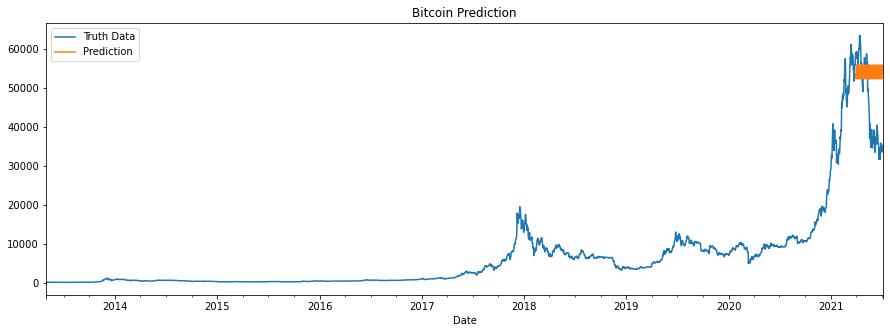

In [27]:
ax = df[['BTC_Close']].plot(figsize = (15,5))
df['Prediction'].plot(ax = ax, style = '-')
plt.legend(['Truth Data','Prediction'])
ax.set_title('Bitcoin Prediction')
plt.show()

In [28]:
np.sqrt(mean_squared_error(test['BTC_Close'],test['Prediction']))

13399.684728369959

In [29]:
test[target].shape

(100, 1)

In [30]:
test['Prediction'].shape

(100,)

In [31]:
test['error'] = np.abs(test['BTC_Close'] - test['Prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending = False).head()

date
2021-06-26    23725.734048
2021-06-25    23471.372288
2021-06-21    21852.778924
2021-05-29    21295.943715
2021-07-03    21243.463317
Name: error, dtype: float64

In [32]:
test.groupby(['date'])['error'].mean().sort_values(ascending = True).head()

date
2021-05-04    319.513029
2021-04-18    355.685002
2021-04-26    493.098537
2021-04-22    550.907636
2021-04-21    725.646640
Name: error, dtype: float64

- Ethereum

In [33]:
df = ETH.copy()
df = df[['Date','ETH_Close']]
df = df.set_index('Date')
df.index= pd.to_datetime(df.index)

In [34]:
df.head()

,ETH_Close
Date,
2015-08-08,0.753325
2015-08-09,0.701897
2015-08-10,0.708448
2015-08-11,1.067860
2015-08-12,1.217440


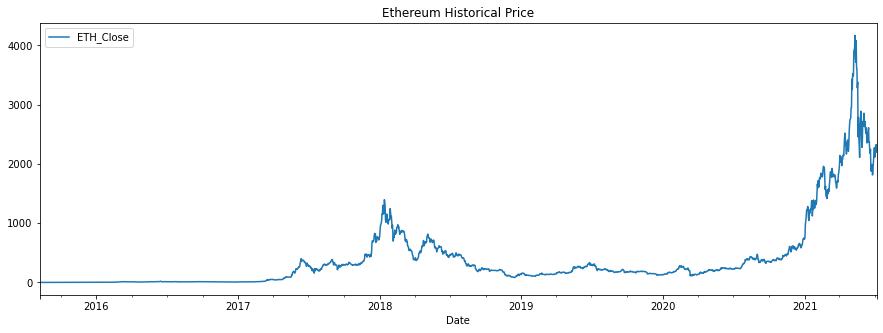

In [35]:
# Bitcoin = Bitcoin.set_index('Date')
df.plot(style = '-', figsize = (15,5),color = Color_pal[0],title = 'Ethereum Historical Price')
plt.show()

In [36]:

print(df.shape)
train = df.iloc[:-100]
test = df.iloc[-100:]
print(train.shape,test.shape)

(2160, 1)
(2060, 1) (100, 1)


<AxesSubplot:xlabel='Date'>

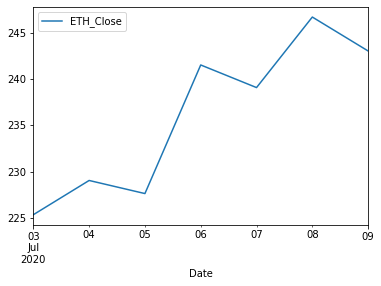

In [37]:
df.loc[(df.index>'2020-07-02') & (df.index <'2020-07-10')].plot()

 - Fetures Creation

In [38]:
def create_features(df):
    """
    Create Time series features based on index.
    """
    df = df.copy()
    df['Dayofweek'] = df.index.day_of_week
    df ['Quater']= df.index.quarter
    df ['Month']= df.index.month
    df ['Year'] = df.index.year
    df ['Dayofyear'] = df.index.dayofyear

    return df

In [39]:
df = create_features(df)
train = create_features(train)
test = create_features(test)
features = ['Dayofweek', 'Quater', 'Month', 'Year', 'Dayofyear']
target = ['ETH_Close']

In [40]:
x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [41]:
reg = Xg.XGBRegressor(n_estimators =1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(x_train,y_train, 
        eval_set = [(x_train,y_train),(x_test,y_test)],
        verbose = 100)

[18:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:444.26291	validation_1-rmse:2596.99658
[100]	validation_0-rmse:172.54050	validation_1-rmse:1574.62476
[200]	validation_0-rmse:75.39500	validation_1-rmse:1222.63342
[300]	validation_0-rmse:41.94744	validation_1-rmse:1121.42859
[400]	validation_0-rmse:32.00482	validation_1-rmse:1087.77734
[500]	validation_0-rmse:25.71123	validation_1-rmse:1073.49829
[600]	validation_0-rmse:23.30002	validation_1-rmse:1067.86829
[700]	validation_0-rmse:20.08048	validation_1-rmse:1068.63025
[800]	validation_0-rmse:17.86438	validation_1-rmse:1069.27686
[900]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [42]:
reg.feature_importances_

array([7.3628442e-04, 2.5952267e-03, 5.4160252e-02, 8.4870958e-01,
       9.3798645e-02], dtype=float32)

 - Forecasting

In [43]:
test['Prediction'] = reg.predict(x_test)
test['Prediction']

Date
2021-03-29    1614.853149
2021-03-30    1614.853149
2021-03-31    1609.164551
2021-04-01    1609.132568
2021-04-02    1687.755493
                 ...     
2021-07-02    1683.479858
2021-07-03    1695.808960
2021-07-04    1684.498291
2021-07-05    1609.863159
2021-07-06    1609.306641
Name: Prediction, Length: 100, dtype: float32

In [44]:
df = df.merge(test[['Prediction']], how = 'left', left_index= True, right_index= True)

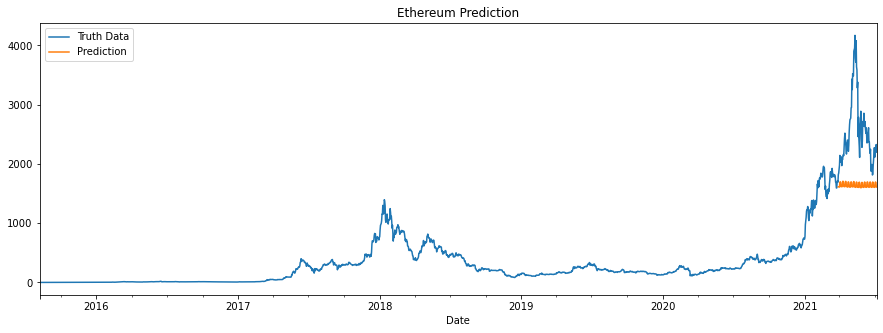

In [45]:
ax = df[['ETH_Close']].plot(figsize = (15,5))
df['Prediction'].plot(ax = ax, style = '-')
plt.legend(['Truth Data','Prediction'])
ax.set_title('Ethereum Prediction')
plt.show()

In [46]:
np.sqrt(mean_squared_error(test[target],test['Prediction']))

1071.0076616519723

In [47]:
test['error'] = np.abs(test['ETH_Close'] - test['Prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending = False).head()

date
2021-05-11    2560.240233
2021-05-14    2396.177454
2021-05-10    2340.809864
2021-05-09    2237.340189
2021-05-08    2199.832548
Name: error, dtype: float64

In [48]:
test.groupby(['date'])['error'].mean().sort_values(ascending = True).head()

date
2021-06-25    130.001412
2021-06-26    133.894124
2021-03-29    204.831813
2021-03-30    231.180548
2021-06-22    265.539865
Name: error, dtype: float64

- Binance Coin

In [49]:
df = BNB.copy()
df = df[['Date','BNB_Close']]
df = df.set_index('Date')
df.index= pd.to_datetime(df.index)

In [50]:
df.head()

,BNB_Close
Date,
2017-07-26,0.105138
2017-07-27,0.107737
2017-07-28,0.104067
2017-07-29,0.107811
2017-07-30,0.106414


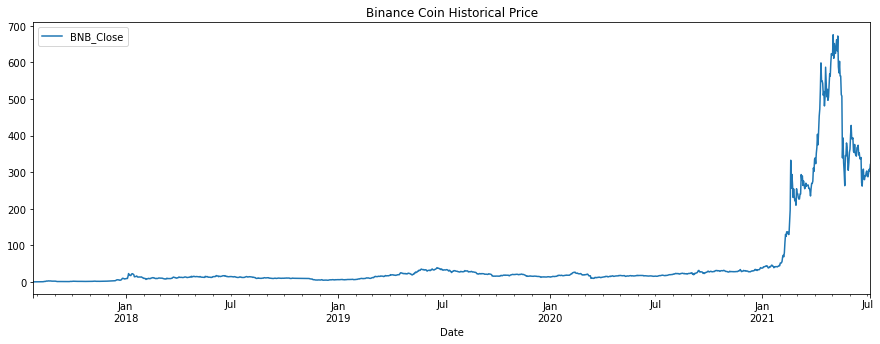

In [51]:
# Bitcoin = Bitcoin.set_index('Date')
df.plot(style = '-', figsize = (15,5),color = Color_pal[0],title = 'Binance Coin Historical Price')
plt.show()

In [52]:

print(df.shape)
train = df.iloc[:-100]
test = df.iloc[-100:]
print(train.shape,test.shape)

(1442, 1)
(1342, 1) (100, 1)


<AxesSubplot:xlabel='Date'>

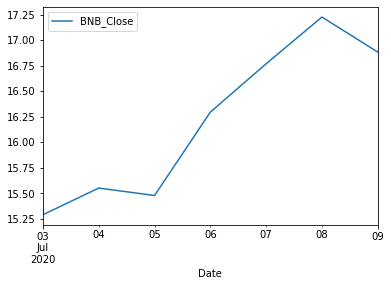

In [53]:
df.loc[(df.index>'2020-07-02') & (df.index <'2020-07-10')].plot()

In [54]:
def create_features(df):
    """
    Create Time series features based on index.
    """
    df = df.copy()
    df['Dayofweek'] = df.index.day_of_week
    df ['Quater']= df.index.quarter
    df ['Month']= df.index.month
    df ['Year'] = df.index.year
    df ['Dayofyear'] = df.index.dayofyear

    return df

In [55]:
df = create_features(df)
train = create_features(train)
test = create_features(test)
features = ['Dayofweek', 'Quater', 'Month', 'Year', 'Dayofyear']
target = ['BNB_Close']

In [56]:
x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [57]:
reg = Xg.XGBRegressor(n_estimators =1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(x_train,y_train, 
        eval_set = [(x_train,y_train),(x_test,y_test)],
        verbose = 100)

[18:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:48.09090	validation_1-rmse:443.56802
[100]	validation_0-rmse:18.71543	validation_1-rmse:295.81003
[200]	validation_0-rmse:8.00199	validation_1-rmse:240.41748
[300]	validation_0-rmse:4.01391	validation_1-rmse:221.80028
[400]	validation_0-rmse:2.45001	validation_1-rmse:215.85809
[500]	validation_0-rmse:1.76914	validation_1-rmse:212.32169
[600]	validation_0-rmse:1.43932	validation_1-rmse:211.49823
[700]	validation_0-rmse:1.19197	validation_1-rmse:211.74275
[800]	validation_0-rmse:1.03965	validation_1-rmse:212.50877
[900]	validation_0-rmse:0.9191

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [58]:
reg.feature_importances_

array([0.00131867, 0.01621824, 0.00537753, 0.84560996, 0.1314756 ],
      dtype=float32)

In [59]:
test['Prediction'] = reg.predict(x_test)
test['Prediction']

Date
2021-03-29    253.229828
2021-03-30    253.161362
2021-03-31    249.379364
2021-04-01    241.979477
2021-04-02    259.316742
                 ...    
2021-07-02    259.103516
2021-07-03    268.259430
2021-07-04    268.259430
2021-07-05    253.055359
2021-07-06    252.986893
Name: Prediction, Length: 100, dtype: float32

In [60]:
df = df.merge(test[['Prediction']], how = 'left', left_index= True, right_index= True)

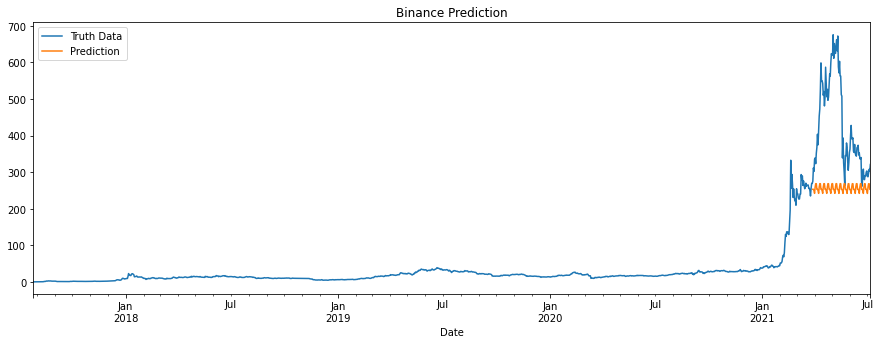

In [64]:
ax = df[['BNB_Close']].plot(figsize = (15,5))
df['Prediction'].plot(ax = ax, style = '-')
plt.legend(['Truth Data','Prediction'])
ax.set_title('Binance Prediction')
plt.show()

In [61]:
np.sqrt(mean_squared_error(test[target],test['Prediction']))

212.65360436904598

In [62]:
test['error'] = np.abs(test['BNB_Close'] - test['Prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending = False).head()

date
2021-05-03    422.435313
2021-05-11    419.201896
2021-05-05    402.264407
2021-05-09    393.704710
2021-05-06    391.201508
Name: error, dtype: float64

In [63]:
test.groupby(['date'])['error'].mean().sort_values(ascending = True).head()

date
2021-05-23     5.451330
2021-06-22     8.657943
2021-06-26    11.041071
2021-06-21    17.762744
2021-03-29    21.984792
Name: error, dtype: float64